In [2]:
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

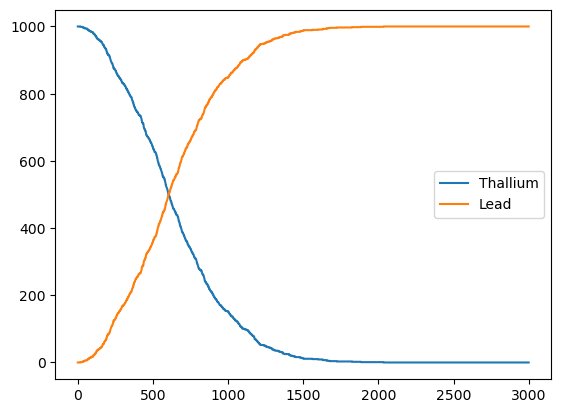

In [3]:
tau = 3052*60               # halflife expressed in seconds
Nth = [1000]; Nld = [0]     # number of atoms of tahlllium and lead

obsTime = 3e3
timeDivision = range(0, int(obsTime), 1)
for t in timeDivision:

    # At every t I compute the decay probability
    decayProb = 1 - 2**(-t/tau)
    decayedAtoms = 0

    # For every atom I check if it decayes
    for i in range(Nth[-1]):
        decayedAtoms += rnd.choice(2, p=[1-decayProb, decayProb])

    # I update the list at every t
    Nth.append(Nth[-1] - decayedAtoms)
    Nld.append(Nld[-1] + decayedAtoms)

plt.plot(timeDivision, Nth[1:], label = "Thallium")
plt.plot(timeDivision, Nld[1:], label = "Lead")
plt.legend()

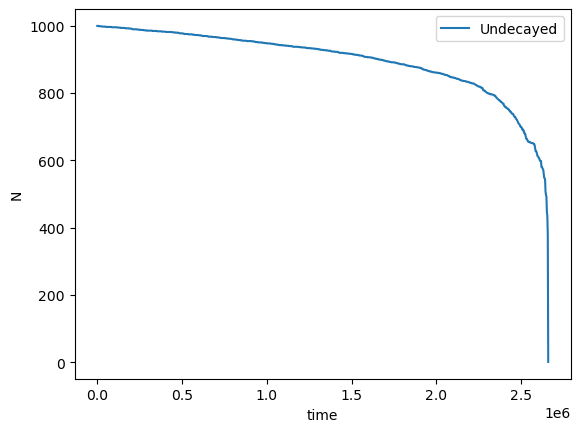

In [11]:
# First we draw 1000 samples from a uniform distribution
normSamples = rnd.uniform(0, 1, 1000)
normSamples.sort()

# Then we invert the cumulative distribution of t
def invCumDist(U):
    return -tau * np.log2(1-U)

# By construction invCumDist reproduces the random variable t (which maps a decay to its time)
decay_times = invCumDist(normSamples)
tMax = max(decay_times)
t_grid = np.linspace(0, tMax, len(decay_times))

# The index in which each decay time is inserted gives the number of decayed atoms before it
Decayed_atoms = [np.searchsorted(t_grid, decay_t) for decay_t in decay_times]

Undecayed_atoms = [Nth[0] - N_decayed for N_decayed in Decayed_atoms]

plt.plot(t_grid, Undecayed_atoms, label = 'Undecayed')
plt.xlabel("time")
plt.ylabel("N")
plt.legend()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b} = \frac{2 Z \hbar^2}{a_0 E b m_e} = \frac{2Z}{a_0 b}k_0
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [32]:
Nalpha = int(1e6); sigma = 1/100; Z = 79; k = 1e-6

bx = rnd.normal(0, sigma, Nalpha)
by = rnd.normal(0, sigma, Nalpha)

b = np.sqrt(bx**2 + by**2)

theta = 2*np.arctan(2*Z*k/b)

Nbb = len(list(filter(lambda x: x > np.pi/2, theta)))
print(f"Number of back-bouncing alphas is {Nbb}")


Number of back-bouncing alphas is 137


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [72]:
import scipy.integrate as intg

def f(x):
    return np.sin(1/(x * (2-x)))**2

I = intg.quad(f, 0, 2)

print(f"Integral: {I}")

################# hit/miss method

Npoints = int(1e5)
X = rnd.uniform(0, 2, Npoints)
Y = rnd.uniform(0, 1, Npoints)

Imc = 0
for (x, y) in zip(X, Y):
        if y < f(x): Imc += 1
Imc *= 2/Npoints

# dom = np.linspace(0, 2, 1000)
# plt.plot(dom, f(dom))
# plt.scatter(X, Y, s=0.3)

print(f"Monte Carlo: {Imc}")

################# mean value method

Xsamples = rnd.uniform(0, 2, Npoints)

Imv = 2/Npoints*np.sum(f(Xsamples))

error = 2*np.std(f(Xsamples))/np.sqrt(Npoints)

print(f"Mean value: {Imv} with error {error}")


Integral: (1.4516877509810684, 0.0027123781525915294)
Monte Carlo: 1.4549200000000002
Mean value: 1.4477884376154067 with error 0.001679416056962986


/var/folders/bq/c0v_5_v15yv4wrwpv0d4mc1r0000gn/T/ipykernel_50933/3883970049.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = intg.quad(f, 0, 2)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [ ]:
def f(args: list):
    output = 0
    for i in range(len(args)):
        output += args[i]**2
    return output

Npoints = int(1e6)
D = 10
side = 2
I = 0

for i in range(Npoints):
    X = rnd.uniform(-1, 1, size=D)
    if f(X) <= 1: I += 1

I *= side**D/Npoints
print(f"{D}-volume of the unitary sphere is {I}")



10-volume of the unitary sphere is 0.00026656180980134855


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [90]:
def f(x):
    return x**(-1/2)/(np.exp(x) + 1)

def w(x):
    return x**(-1/2)

# integral of 1/sqrt(x) is 2sqrt(x)
def W(x):
    return 2*x**(1/2)

a=0; b=1
Npoints = int(1e6)
X = rnd.uniform(a, b, Npoints)

sum = 0
for x in X:
    sum += f(x)/w(x)

I = 1/Npoints * sum * (W(b) - W(a))
print(f"Integral ≈ {I}")


Integral ≈ 0.7598715254367412
